In [22]:
import settings
import helpers
import os
import numpy as np
import nibabel as nib
import dicom as dc
from nilearn.input_data import NiftiMasker as nm
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn import plotting
import colorsys
import random

In [2]:
mask_img = nib.load('./ISBI-deid-TRAIN-MASK/1001_Y19990102.nii')

In [3]:
mask_img.shape

(512, 512, 162)

In [4]:
mask_img.get_data_dtype()

dtype('<u2')

In [5]:
header = mask_img.header

In [6]:
header

In [7]:
header.get_data_shape()

(512, 512, 162)

In [8]:
mask_img.shape

(512, 512, 162)

In [9]:
mask_img_pixels = mask_img.get_data()

In [10]:
mask_img_pixels.shape
mask_img_

(512, 512, 162)

In [11]:
img = helpers.load_scan("./ISBI-deid-TRAIN/1001/19990102")

In [15]:

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [16]:

def display_images(images, titles=None, cols=4, cmap=None, norm=None,
                   interpolation=None):
    """Display the given set of images, optionally with titles.
    images: list or array of image tensors in HWC format.
    titles: optional. A list of titles to display with each image.
    cols: number of images per row
    cmap: Optional. Color map to use. For example, "Blues".
    norm: Optional. A Normalize instance to map values to colors.
    interpolation: Optional. Image interporlation to use for display.
    """
    titles = titles if titles is not None else [""] * len(images)
    rows = len(images) // cols + 1
    plt.figure(figsize=(14, 14 * rows // cols))
    i = 1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.title(title, fontsize=9)
        plt.axis('off')
        plt.imshow(image.astype(np.uint8), cmap=cmap,
                   norm=norm, interpolation=interpolation)
        i += 1
    plt.show()


In [17]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image



In [25]:
new_img = apply_mask(img,mask_img_pixels,random_colors(3))

TypeError: list indices must be integers or slices, not tuple

In [30]:
img = helpers.get_pixels_hu(img)

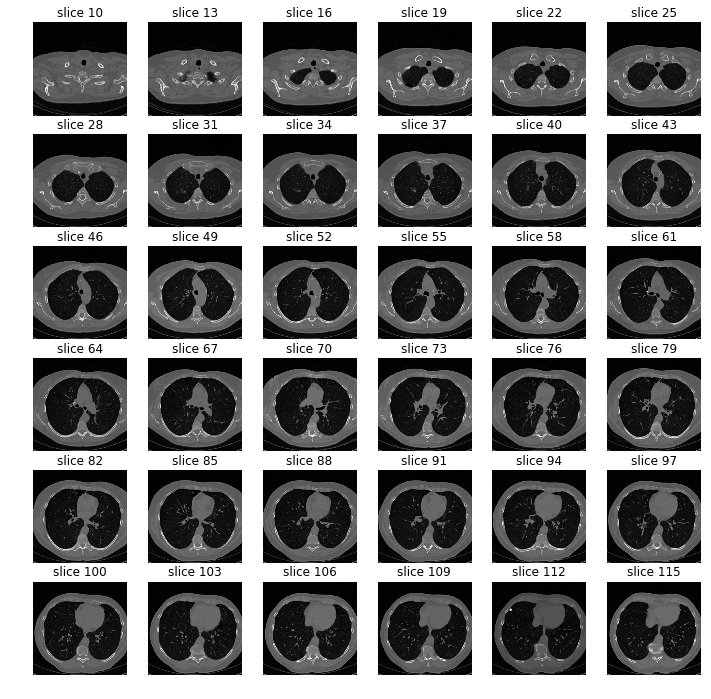

In [35]:
helpers.sample_stack(img)


In [38]:
mask_img_pixels_swap = np.swapaxes(mask_img_pixels,0,2)
mask_img_pixels_swap = np.swapaxes(mask_img_pixels_swap,1,2)

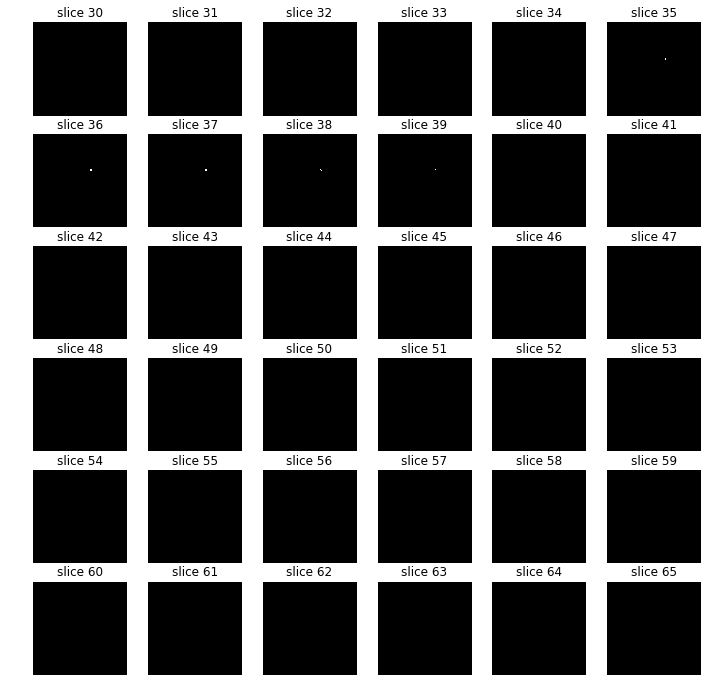

In [41]:
helpers.sample_stack(mask_img_pixels_swap, start_with=30,show_every=1)

In [45]:
for i in range(len(mask_img_pixels_swap)):
    print(i,np.count_nonzero(mask_img_pixels_swap[i]))
    
    

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 8
35 61
36 116
37 109
38 67
39 25
40 1
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
